![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

 
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics

# Benchmark: Sneddon lower-dimensional interface elements with fracture propagation

The Fluid is injected at the left side of the fracture. In this propagation case the fracture is able to propagate with increaseing injection volume.

<center>
<figure>
      <img src="Sneddon-propagation.png" alt="Benchmark" style="width:60%">
       <figcaption style="line-height:1.5;width:80%" >  
        Fig.1.: Geometry of the Sneddon benchmark.
     </figcaption>
</figure>
</center>

In [1]:
#! /opt/anaconda/bin/ python3.8
import math
from ogs6py.ogs import OGS
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #für Farb en
plt.rcParams.update({'font.size': 16})

In [2]:
qin  = 2e-6  #total injection rate
qin_sym = qin/2  #injection rate in symmetric geometry
nu   = 0.15
E    = 80e9

#Fracture properties
Enu  = E/(1-nu**2)
Gc   = 20     #fracture thoughness
b0   = 1e-4   #aperture at t=0 in a0
a0   = 0.1    #initial fracture lenght [m]
a02   = 0.2    #fracture evaluation lenght[m]

Vc=(4*np.pi*Gc*a0**3/Enu)**(0.5)
pc=(Gc*Enu/np.pi/a0)**(0.5)
tc=Vc/qin
p_V=(2*Enu*Gc**2/np.pi/(tc*qin))**(1/3) #pressure after x seconds (t min = tc)
tend=2.4    #simulationtime[s]

print("Vc  [m³/s] = "+str(Vc)) # required injected Volume to initialise fracture propagation
print("pc  [Pa]   = "+str(pc)) # required pressure to initialise fracture propagation
print("p_V [Pa]   = "+str(p_V))
print("tc  [s]    = "+str(tc)) # initialization fracture propagation

Vc  [m³/s] = 1.7524003021239251e-06
pc  [Pa]   = 2282583.491427138
p_V [Pa]   = 2282583.491427136
tc  [s]    = 0.8762001510619626


In [3]:
#Reading the OGS project files:
pvd_prop_rate=OGS(INPUT_FILE="crack_propagation_CL_rate.prj", PROJECT_FILE="crack_propagation_CL_rate_jupyter.prj")
#pvd_prop_rate=OGS(INPUT_FILE="crack_propagation_CL_rate.prj", PROJECT_FILE="crack_propagation_CL_rate.prj")

In [4]:
pvd_prop_rate.replace_text(tend, xpath="./time_loop/processes/process/time_stepping/t_end")

#create injection curve
string=str(0)+" "+str(tend)
pvd_prop_rate.replace_text(string, xpath="./curves/curve[name='curve_q_in']/coords")
string=str(qin_sym)+" "+str(qin_sym)
pvd_prop_rate.replace_text(string, xpath="./curves/curve[name='curve_q_in']/values")

pvd_prop_rate.replace_parameter(name="nu",value=nu)
pvd_prop_rate.replace_parameter(name="E",value=E)
pvd_prop_rate.replace_text("Sneddon_propagation_output", xpath="./time_loop/output/prefix")

#pvd_prop_rate.write_input()

In [5]:
#simulation and file manipulation is deactivated due long calculation time!
PATH_OGS="/home/xmg/build/release/bin/"
#pvd_prop_rate.run_model(path=PATH_OGS)

Chose timesteps for evaluation (part of output-files):

In [6]:
ts1=0.878083 #nearest timestep to tc (see above)
ts2=1.388083
ts3=1.883083
ts4=2.4

In [7]:
import vtuIO
#pvd_prop_rate = vtuIO.PVDIO(".","Center_Crack_IP.pvd", dim=2)
pvd_prop_rate = vtuIO.PVDIO(".","Sneddon_propagation_output.pvd", dim=2)

./Sneddon_propagation_output.pvd


In [8]:
line_0=[(i,1.0,0) for i in np.linspace(start=0.0, stop=a02, num=100)]
lines = {'crack': line_0,}

''

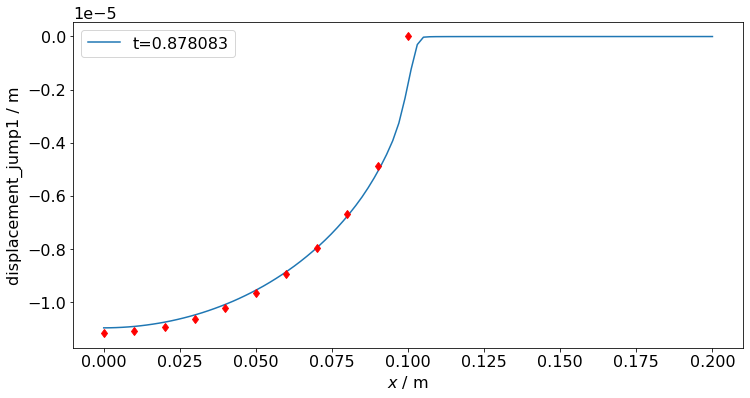

In [9]:
#HIDDEN
#sns.set_palette("Paired",n_colors=10)
#fig, ax = plt.subplots(ncols=2,figsize=(20,8))
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(0,a02,100)
for i in lines:

    
    prop_rate1 = pvd_prop_rate.read_point_set_data(ts1,'displacement_jump1', pointsetarray=lines[i]).T[1]
    ax.plot(x,prop_rate1, label='t='+str(ts1),ls='-')

ax.legend()
ax.set_xlabel('$x$ / m')
ax.set_ylabel('displacement_jump1 / m')


steps = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1] #

for x in steps:
    uy=-2*2*pc*a0/Enu*(1-x**2/a0**2)**(0.5)
    ax.plot(x,uy,label='analytic solution', marker='d', color='r')

;

Integrate the displacement change $\Delta u$ to calculate the volume change of the fracture:

$$
\Delta u(x)=\frac{2pa_\text{0}}{E'}\sqrt{1-\frac{x^\mathrm{2}}{a^\mathrm{2}_\text{0}}}
$$

$$
\Delta V(x)=\frac{2pa_\text{0}}{E'}\left ((a_\text{0}arcsin\frac{x}{a_\text{0}})+a_\text{0}\sqrt{1-\frac{x^\mathrm{2}}{a^\mathrm{2}_\text{0}}}\right )
$$

volume numeric [m³]
1.7571866487513694e-06
2.771183182274985e-06
3.7546293911198857e-06
4.780738109614706e-06
 
volume analytic [m³]
1.7561660000000001e-06
2.776166e-06
3.7661660000000012e-06
4.7761660000000004e-06
 
volume analytic (integration) [m³]
1.756166e-06
2.776166e-06
3.7661660000000016e-06
4.7761660000000004e-06


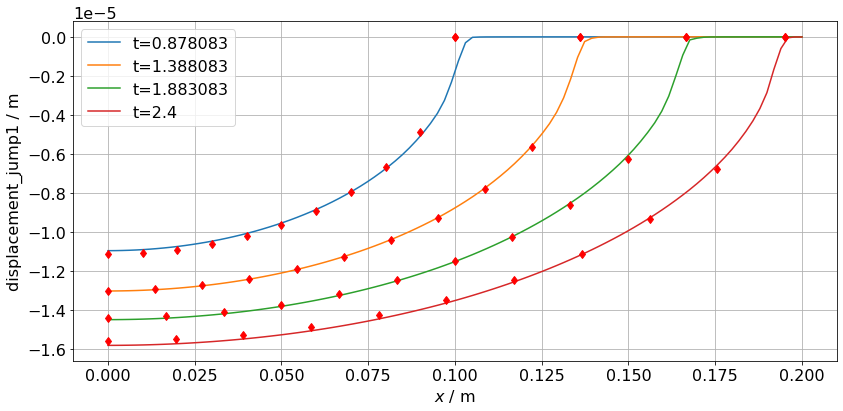

In [10]:
line_02=[(i,1.0,0) for i in np.linspace(start=0.0, stop=a02, num=100)]
lines = {'crack': line_02,}

fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(0,a02,100)
for i in lines:

    
    prop_rate1 = pvd_prop_rate.read_point_set_data(ts1,'displacement_jump1', pointsetarray=lines[i]).T[1]
    ax.plot(x,prop_rate1, label='t='+str(ts1),ls='-')
    
    prop_rate2 = pvd_prop_rate.read_point_set_data(ts2,'displacement_jump1', pointsetarray=lines[i]).T[1]
    ax.plot(x,prop_rate2, label='t='+str(ts2),ls='-')
    
    prop_rate3 = pvd_prop_rate.read_point_set_data(ts3,'displacement_jump1', pointsetarray=lines[i]).T[1]
    ax.plot(x,prop_rate3, label='t='+str(ts3),ls='-')
    
    prop_rate4 = pvd_prop_rate.read_point_set_data(ts4,'displacement_jump1', pointsetarray=lines[i]).T[1]
    ax.plot(x,prop_rate4, label='t='+str(ts4),ls='-')
    
    
ax.legend()
ax.set_xlabel('$x$ / m')
ax.set_ylabel('displacement_jump1 / m')

#displacement at critical conditions
steps = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1] #

for x in steps:
    uy=-2*2*pc*a0/Enu*(1-x**2/a0**2)**(0.5)
    ax.plot(x,uy,label='displacement at pc', marker='d', color='r')
;


#fracture total volume numeric
print('volume numeric [m³]')
print(abs(2*a02*np.mean(prop_rate1)))
print(abs(2*a02*np.mean(prop_rate2)))
print(abs(2*a02*np.mean(prop_rate3)))
print(abs(2*a02*np.mean(prop_rate4)))

#fracture lenght analytic
aV1=(Enu*(0.878083*qin)**2/(4*np.pi*Gc))**(1/3)
aV2=(Enu*(1.388083*qin)**2/(4*np.pi*Gc))**(1/3)
aV3=(Enu*(1.883083*qin)**2/(4*np.pi*Gc))**(1/3)
aV4=(Enu*(2.388083*qin)**2/(4*np.pi*Gc))**(1/3)

#plot(aV)
ax.plot(aV1,0, marker='d', color='r')
ax.plot(aV2,0, marker='d', color='r')
ax.plot(aV3,0, marker='d', color='r')
ax.plot(aV4,0, marker='d', color='r')

#fracture volume analytic
V1anl=(4*np.pi*Gc*aV1**3/Enu)**(0.5)
V2anl=(4*np.pi*Gc*aV2**3/Enu)**(0.5)
V3anl=(4*np.pi*Gc*aV3**3/Enu)**(0.5)
V4anl=(4*np.pi*Gc*aV4**3/Enu)**(0.5)

print(' ')
print('volume analytic [m³]')
print(V1anl)
print(V2anl)
print(V3anl)
print(V4anl)

print(' ')
print('volume analytic (integration) [m³]')
p1anl=(Gc*Enu/np.pi/aV1)**(0.5)
p2anl=(Gc*Enu/np.pi/aV2)**(0.5)
p3anl=(Gc*Enu/np.pi/aV3)**(0.5)
p4anl=(Gc*Enu/np.pi/aV4)**(0.5)
#V=2*p1anl*aV1/Enu*((aV1*np.arcsin(x/aV1))+aV1*(1-x**2/aV1**2)**(1/2))*2
V1anl_2=2*p1anl*aV1/Enu*((aV1*np.arcsin(aV1/aV1))+aV1*(1-aV1**2/aV1**2)**(1/2))*2
V2anl_2=2*p2anl*aV2/Enu*((aV2*np.arcsin(aV2/aV2))+aV2*(1-aV2**2/aV2**2)**(1/2))*2
V3anl_2=2*p3anl*aV3/Enu*((aV3*np.arcsin(aV3/aV3))+aV3*(1-aV3**2/aV3**2)**(1/2))*2
V4anl_2=2*p4anl*aV4/Enu*((aV4*np.arcsin(aV4/aV4))+aV4*(1-aV4**2/aV4**2)**(1/2))*2

print(V1anl_2)
print(V2anl_2)
print(V3anl_2)
print(V4anl_2)

#displacement at selected Timestep
aV=aV4
panl=p4anl
steps = [0,aV*0.1,aV*0.2,aV*0.3,aV*0.4,aV*0.5,aV*0.6,aV*0.7,aV*0.8,aV*0.9,aV] 
for x in steps:
    uy=-2*2*panl*aV/Enu*(1-x**2/aV**2)**(0.5)
    ax.plot(x,uy,label='displacement at timestep 4', marker='d', color='r')
;

aV=aV3
panl=p3anl
steps = [0,aV*0.1,aV*0.2,aV*0.3,aV*0.4,aV*0.5,aV*0.6,aV*0.7,aV*0.8,aV*0.9,aV] 
for x in steps:
    uy=-2*2*panl*aV/Enu*(1-x**2/aV**2)**(0.5)
    ax.plot(x,uy,label='displacement at timestep 3', marker='d', color='r')
;

aV=aV2
panl=p2anl
steps = [0,aV*0.1,aV*0.2,aV*0.3,aV*0.4,aV*0.5,aV*0.6,aV*0.7,aV*0.8,aV*0.9,aV] 
for x in steps:
    uy=-2*2*panl*aV/Enu*(1-x**2/aV**2)**(0.5)
    ax.plot(x,uy,label='displacement at timestep 2', marker='d', color='r')
;


plt.grid()
fig.tight_layout()

In [11]:
#fracture is open at tc

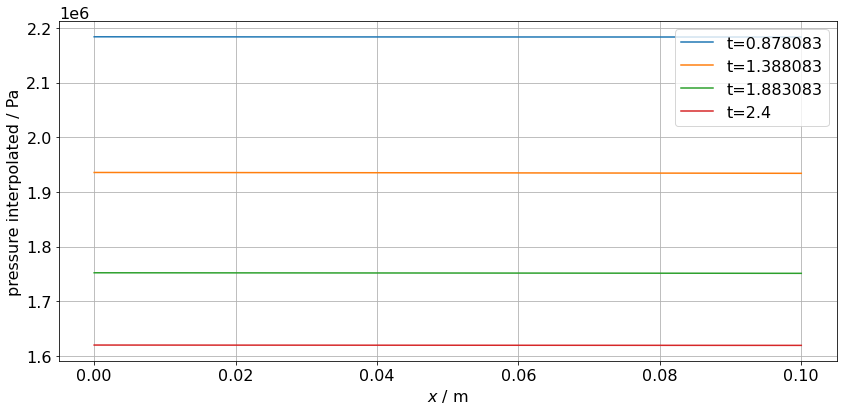

In [12]:
line_0=[(i,1.0,0) for i in np.linspace(start=0.0, stop=a0, num=100)]
lines = {'crack': line_0,}
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(0,a0,100)
for i in lines:

    
    prop_rate1 = pvd_prop_rate.read_point_set_data(ts1,'pressure_interpolated', pointsetarray=lines[i])
    ax.plot(x,prop_rate1, label='t='+str(ts1),ls='-')
    prop_rate2 = pvd_prop_rate.read_point_set_data(ts2,'pressure_interpolated', pointsetarray=lines[i])
    ax.plot(x,prop_rate2, label='t='+str(ts2),ls='-')
    prop_rate3 = pvd_prop_rate.read_point_set_data(ts3,'pressure_interpolated', pointsetarray=lines[i])
    ax.plot(x,prop_rate3, label='t='+str(ts3),ls='-')
    prop_rate4 = pvd_prop_rate.read_point_set_data(ts4,'pressure_interpolated', pointsetarray=lines[i])
    ax.plot(x,prop_rate4, label='t='+str(ts4),ls='-')

ax.legend()
ax.set_xlabel('$x$ / m')
ax.set_ylabel('pressure interpolated / Pa')
plt.grid()
fig.tight_layout()

In [13]:
#Punktauswahl:
#points = {"pt_IN": (0,0.5,0), "pt_OUT": (25,0.5,0)}
pt_in = {"pt0": (0,1,0)}
pt_out = {"pt01": (0.1,1,0)}

# Ergebnisdatasets:
results_pt0  = {}
results_pt01 = {}

In [14]:
results_pt0["pressure"]=pvd_prop_rate.read_time_series("pressure",pts=pt_in)
results_pt01["pressure"]=pvd_prop_rate.read_time_series("pressure",pts=pt_out)

<ipython-input-15-04004f55c48c>:13: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(pvd_prop_rate.timesteps,(2*Enu*Gc**2/np.pi/(pvd_prop_rate.timesteps*qin))**(1/3),label='analytic', ls='--')


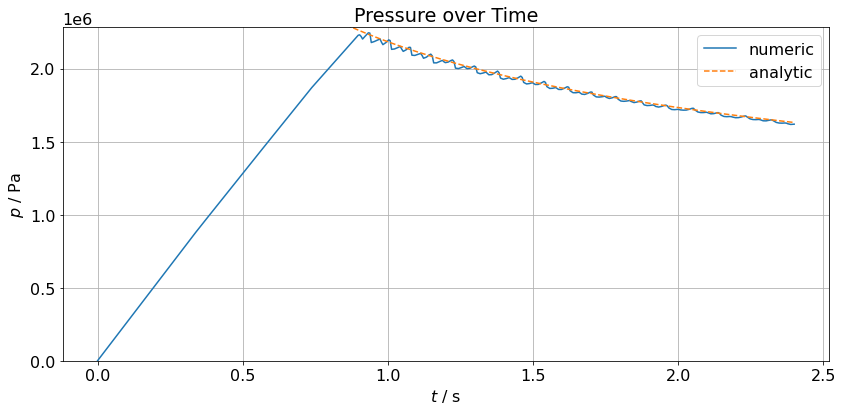

In [15]:
pt0_points=(results_pt0['pressure']['pt0'])
pt01_points=(results_pt01['pressure']['pt01'])

Title=('Pressure over Time')
Figname=('Pressure_over_time_p0.png')

#for pt0_points,title,figname in zip(pt0_points,Title,Figname):
fig, ax = plt.subplots(figsize=(12,6))
    
ax.plot(pvd_prop_rate.timesteps,pt0_points,label='numeric')
#ax.plot(pvd_prop_rate.timesteps,pt01_points,label='outlet')

ax.plot(pvd_prop_rate.timesteps,(2*Enu*Gc**2/np.pi/(pvd_prop_rate.timesteps*qin))**(1/3),label='analytic', ls='--')
    #p_V=(2*Enu*Gc**2/np.pi/(3*qin))**(1/3) #druck nach 3 Sekunden##############
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$p$ / Pa')
plt.title(Title)
ax.legend()
plt.ylim(0,pc)
plt.grid()
fig.tight_layout()
plt.show
plt.savefig(Figname,dpi=300)
#;

''

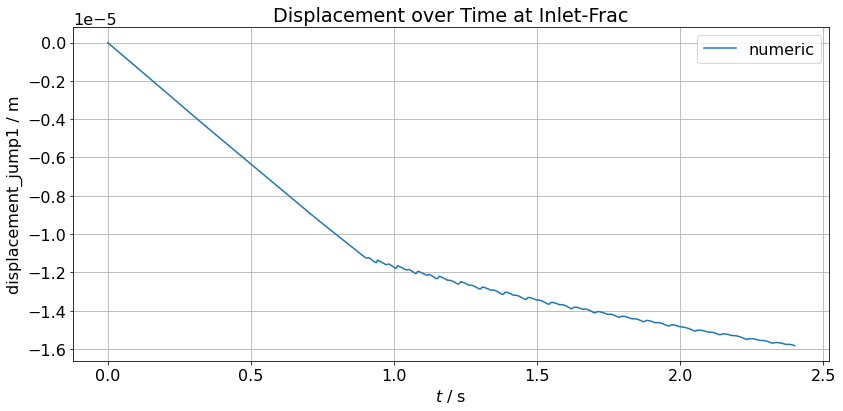

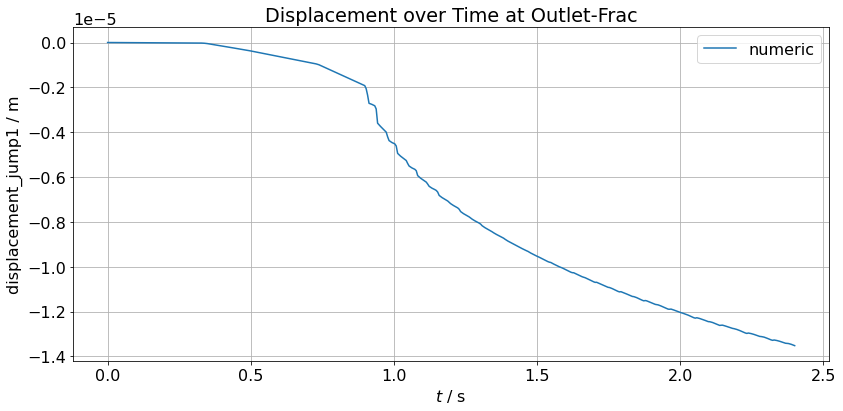

In [16]:
results_pt0["displacement_jump1"]=pvd_prop_rate.read_time_series("displacement_jump1",pts=pt_in)
results_pt01["displacement_jump1"]=pvd_prop_rate.read_time_series("displacement_jump1",pts=pt_out)

pt0_points_disp=(results_pt0['displacement_jump1']['pt0'],results_pt01['displacement_jump1']['pt01'])

Title=('Displacement over Time at Inlet-Frac','Displacement over Time at Outlet-Frac')
Figname=('Disp_over_time_p0.png','Disp_over_time_p01.png')

for pt0_points_disp,title,figname in zip(pt0_points_disp,Title,Figname):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(pvd_prop_rate.timesteps,pt0_points_disp.T[1],label='numeric')
    ax.set_xlabel('$t$ / s')
    ax.set_ylabel('displacement_jump1 / m')
    plt.title(title)
    ax.legend()
    #ax.plot(2,-1e-5,label='LIEx', marker='d')
    # plt.ylim(1.1e7,1.15e7)
    plt.grid()
    fig.tight_layout()
    plt.show
    plt.savefig(figname,dpi=300)
;

In [17]:
#Outlet is open before reaching tc!